In [2]:
#%% LOCAL PATH
import time

data_path = './Data/'

#%% DATA READING

import numpy as np
from Bio import SeqIO
from sklearn.model_selection import train_test_split


type_cell = open(data_path + '/type/uniprot_sprot_eukarya.txt','r')
on_type={}

for line in type_cell:
    line = line.replace("\n","")
    line = line.split("\t")
    id_fasta = line[0]
    on_type[id_fasta] = 1;
    
print(len(on_type))


truetf = open(data_path + 'ListID.txt','r')
true_tf={}

for line in truetf:
    line = line.replace("\n","")
    line = line.split("\t")
    id_fasta = line[0]
    true_tf[id_fasta] = 1;
    
print(len(true_tf))


truetf = open(data_path + 'ListID.txt','r')
true_tf={}

for line in truetf:
    line = line.replace("\n","")
    line = line.split("\t")
    id_fasta = line[0]
    true_tf[id_fasta] = 1;
    
print(len(true_tf))


def read_fasta_data(fasta_file, booltf):
    result = []
    seq_ids = []
    fp = open(fasta_file, 'r')
    for seq_record in SeqIO.parse(fp, 'fasta'):
        seq = seq_record.seq
        seq_id = seq_record.id
        seqs = seq_id.split('|')
        seq_id_short = seqs[-1].replace(" ","")
        #if seq_id_short in on_type:
        if len(seq) <= 1000:
            if booltf == True and seq_id in true_tf:
                result.append(str(seq))
                seq_ids.append(seq_id)
            else:
                result.append(str(seq))
                seq_ids.append(seq_id)

                #print(seq_id_short, seq_id)
    fp.close()
    return result, seq_ids

FILE_TFS = data_path + 'TFs.fasta'
FILE_NOTFS = data_path + 'NoTFs.fasta'

seq_tfs, seq_tfs_ids = read_fasta_data(FILE_TFS, True)
seq_notfs, seq_notfs_ids = read_fasta_data(FILE_NOTFS, False)
print(len(seq_tfs))
print(len(seq_notfs))


FileNotFoundError: [Errno 2] No such file or directory: '../../../../Data//type/uniprot_sprot_eukarya.txt'

In [2]:
import random

number_seqcontact = 657
def cropping(percent, seq_list):
    
    crop_size = [3,5]
    times = [2,3]
    full_virtual_seq = []
    
    number_virtual_seq = round(len(seq_list) * percent)
    selected_seq = random.choices(seq_list, k=number_virtual_seq)
    print("the number of virtual sequences based on CROPPING'S TRANSFORMATION IS:", len(selected_seq))
    
    for j in selected_seq:
        start = random.randint(0, 1)
        positions_crop3 = [random.randint(0,len(j)-3) for a in range(0,times[start])]
        start = 1 if start == 0 else 0
        positions_crop5 = [random.randint(0,len(j)-5) for a in range(0,times[start])]
        pos_crop7 = random.randint(0,len(j)-7)
        virtual_j = j
        for i in crop_size:    
            
            if i == 3: 
                for m in positions_crop3: virtual_j = virtual_j[:m] + "ZZZ" + virtual_j[m+i:]
            if i == 5: 
                for m in positions_crop5: virtual_j = virtual_j[:m] + "ZZZZZ" + virtual_j[m+i:]
        
        virtual_j = virtual_j[:pos_crop7] + "ZZZZZZZ" + virtual_j[pos_crop7+7:] if len(j)>100 else virtual_j
        full_virtual_seq.append(virtual_j)
    
    return full_virtual_seq

def inserting(percent, seq_list):
    
    amino_acids_general = ['A', 'C', 'D', 'E', 
                           'F', 'G', 'H', 'I', 
                           'K', 'L', 'M', 'N', 
                           'P', 'Q', 'R', 'S',
                           'T', 'V', 'W', 'Y', 
                           'Y']
    crop_size = [3,5]
    times = [2,3]
    full_virtual_seq = []
    
    number_virtual_seq = round(len(seq_list) * percent)
    #print(number_virtual_seq)
    selected_seq = random.choices(seq_list, k=number_virtual_seq)
    print("the number of virtual sequences based on INSERTING'S TRANSFORMATION IS:", len(selected_seq))
    
    for j in selected_seq:
        #print(j)
        #print(len(j))
        start = random.randint(0, 1)
        positions_crop3 = [random.randint(0,len(j)-3) for a in range(0,times[start])]
        start = 1 if start == 0 else 0
        positions_crop5 = [random.randint(0,len(j)-5) for a in range(0,times[start])]
        pos_crop7 = random.randint(0,len(j)-7)
        #print(pos_crop7, positions_crop5, positions_crop3)
        virtual_j = j
        for i in crop_size:    
            
            if i == 3: 
                for m in positions_crop3: virtual_j = virtual_j[:m] + amino_acids_general[random.randint(0,20)] +  amino_acids_general[random.randint(0,20)] +  amino_acids_general[random.randint(0,20)]+ virtual_j[m+i:]
            if i == 5: 
                for m in positions_crop5: virtual_j = virtual_j[:m] + amino_acids_general[random.randint(0,20)] +  amino_acids_general[random.randint(0,20)] +  amino_acids_general[random.randint(0,20)] + amino_acids_general[random.randint(0,20)] +  amino_acids_general[random.randint(0,20)] + virtual_j[m+i:]
        
        if len(j) > 120: virtual_j = virtual_j[:pos_crop7] + amino_acids_general[random.randint(0,20)] +  amino_acids_general[random.randint(0,20)] +  amino_acids_general[random.randint(0,20)] + amino_acids_general[random.randint(0,20)] +  amino_acids_general[random.randint(0,20)] +  amino_acids_general[random.randint(0,20)] + amino_acids_general[random.randint(0,20)] + virtual_j[pos_crop7+7:] if len(j)>100 else virtual_j
       
        #print("virtual")
        #print(virtual_j)
        #print(len(virtual_j))
        #exit(1)
        full_virtual_seq.append(virtual_j)
    
    return full_virtual_seq

def reversing(percent, seq_list):
    
    full_virtual_seq = []    
    number_virtual_seq = round(len(seq_list) * percent)
    selected_seq = random.choices(seq_list, k=number_virtual_seq)
    print("the number of virtual sequences based on REVERSING'S TRANSFORMATION IS:", len(selected_seq))
    
    for i in range(0,number_virtual_seq): 
        virtual_j = selected_seq[i][::-1]
        full_virtual_seq.append(virtual_j)
        
    return full_virtual_seq

def shifting(percent, seq_list):
    
    full_virtual_seq = []    
    number_virtual_seq = round(len(seq_list) * percent)
    selected_seq = random.choices(seq_list, k=number_virtual_seq)
    print("the number of virtual sequences based on SHIFTING'S TRANSFORMATION IS:", len(selected_seq))
    count = 0
    
    if count < (round(number_virtual_seq) * 0.25):
        
        for i in range(0, (round(number_virtual_seq*0.25)-1)):
            
            j = selected_seq[i]
            #print(j)
            #print(len(j))
            virtual_j = j[round(len(j) * 0.05):]
            #print("virtual")
            #print(virtual_j)
            #print(len(virtual_j))
            full_virtual_seq.append(virtual_j)
            count += 1
            #print(count)
            
    if (count >= (round(number_virtual_seq * 0.25)-1)) and (count <= (round(number_virtual_seq * 0.50)-1)):
        
        for i in range(0, (round(number_virtual_seq*0.25)-1)):
            
            j = selected_seq[i]
            #print(j)
            #print(len(j))
            virtual_j = j[round(len(j) * 0.1):]
            #print("virtual")
            #print(virtual_j)
            #print(len(virtual_j))
            full_virtual_seq.append(virtual_j)
            count += 1
    
    if (count >= (round(number_virtual_seq * 0.50)-1)) and (count <= (round(number_virtual_seq * 0.75)-1)):
       
        
        for i in range(0, (round(number_virtual_seq*0.25)-1)):
            
            j = selected_seq[i]
            #print(j)
            #print(len(j))
            virtual_j = j[0:len(j)-(round(len(j) * 0.05))]
            #print("virtual")
            #print(virtual_j)
            #print(len(virtual_j))
            full_virtual_seq.append(virtual_j)
            count += 1

    if (count >= (round(number_virtual_seq * 0.75)-1)) and (count < number_virtual_seq):
        
        for i in range(0, (round(number_virtual_seq*0.25)-1)):
            
            j = selected_seq[i]
            #print(j)
            #print(len(j))
            virtual_j = j[0:len(j)-(round(len(j) * 0.1))]
            #print("virtual")
            #print(virtual_j)
            #print(len(virtual_j))
            full_virtual_seq.append(virtual_j)
            count += 1
        
                       
    return full_virtual_seq
    
    

In [3]:

virtual_seq_tfs_1 = cropping(0.04, seq_tfs)
virtual_seq_tfs_2 = inserting(0.04, seq_tfs)
virtual_seq_tfs_3 = reversing(0.15, seq_tfs)
virtual_seq_tfs_4 = shifting(0.08, seq_tfs)


#virtual_seq_tfs_1 = shifting(0.20, seq_tfs)
#virtual_seq_tfs_2 = inserting(0.10, seq_tfs)
#print(len(virtual_seq_tfs_2))
#print(len(virtual_seq_tfs_1))



#seq_tfs = seq_tfs + virtual_seq_tfs_3 + virtual_seq_tfs_4 
#seq_tfs = seq_tfs + virtual_seq_tfs_1 
#print(len(seq_tfs))



the number of virtual sequences based on CROPPING'S TRANSFORMATION IS: 884
the number of virtual sequences based on INSERTING'S TRANSFORMATION IS: 884
the number of virtual sequences based on REVERSING'S TRANSFORMATION IS: 3315
the number of virtual sequences based on SHIFTING'S TRANSFORMATION IS: 1768


In [4]:
print(seq_tfs[-1])

MSGHSKWHNIQAKKSKVDAKRGKIFTKIGKEIAIAAKNGGPNPDANPKLRDVIAKAKANNMPKDSIERAIKKAAGELAGVNYEEILYEGYGPDGIAVLVQALTDNKNRSAGNVRHAFSKHGGNLGSTGCVSFMFQTKGQIVIEKNDELDEEELMMMALECGAEDFQSEDEVYIITTSPEDFGSVRETLEEKGLEFLEAEVKSIPDTYTVIDENTAGKFQKMLDVLEDDEDVQDVYHNAEFPEGWEE


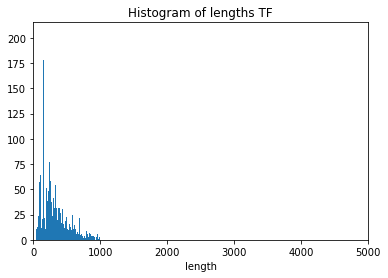

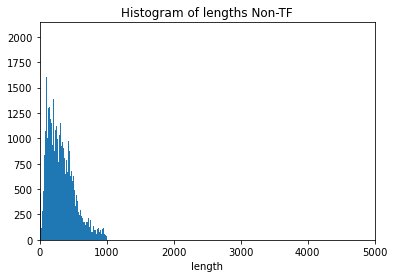

319.6315043650146 332.16121442468665


In [5]:
#%% PLOT LENGTH GENERATOR

import matplotlib.pyplot as plt
from statistics import mean

lengths_tfs = [len(t) for t in seq_tfs]
plt.hist(lengths_tfs , bins = len(set(lengths_tfs)))
plt.title('Histogram of lengths TF')
plt.xlabel('length')
plt.xlim(0, 5000)
plt.show()

lengths_notfs = [len(t) for t in seq_notfs]
plt.hist(lengths_notfs , bins = len(set(lengths_notfs)))
plt.title('Histogram of lengths Non-TF')
plt.xlabel('length')
plt.xlim(0, 5000)
plt.show()
print(mean(lengths_notfs), mean(lengths_tfs))

In [6]:
#%% Conteo de aminoacidos

def amino_count(sequences):

  amino_input = set()
  amino2count = {}

  for seq in sequences:

    seq_1 = list(seq)

    for amino in seq_1:
      if amino not in amino_input:
        amino_input.add(amino)
        amino2count[amino] = 1
      else:
        amino2count[amino] += 1

  return amino2count

amino2count_tf = amino_count(seq_tfs)
amino2count_notf = amino_count(seq_notfs)

print('Aminoacids present in tf dataset: ', amino2count_tf)
print('Aminoacids present in notf dataset: ', amino2count_notf)


Aminoacids present in tf dataset:  {'M': 174076, 'G': 465010, 'R': 448459, 'K': 429938, 'I': 353161, 'Q': 359141, 'T': 386730, 'D': 382192, 'E': 533751, 'N': 315288, 'V': 413381, 'F': 244202, 'L': 666846, 'A': 543272, 'Y': 194763, 'S': 612425, 'C': 127267, 'P': 421581, 'H': 205792, 'W': 63704, 'X': 115, 'Z': 1}
Aminoacids present in notf dataset:  {'M': 4158903, 'R': 9342448, 'S': 10619830, 'L': 16353441, 'A': 14355481, 'I': 10197416, 'T': 8927044, 'G': 12209943, 'H': 3801535, 'F': 6620100, 'Y': 4966988, 'P': 7758769, 'K': 9746194, 'Q': 6376949, 'V': 11809645, 'N': 6676570, 'D': 9216082, 'W': 1889300, 'E': 11217023, 'C': 2240543, 'X': 7395, 'U': 322, 'Z': 246, 'B': 273, 'O': 29}


,Amino,Values
13,A,543272
16,C,127267
7,D,382192
8,E,533751
11,F,244202
1,G,465010
18,H,205792
4,I,353161
3,K,429938
12,L,666846


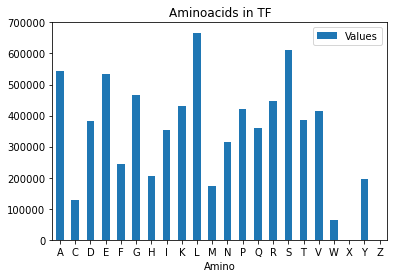

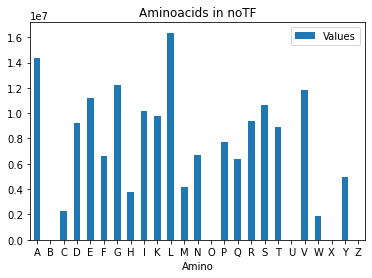

In [7]:
def histograms(amino2count_tf, amino2count_notf):
    
    import pandas as pd
    
    amino_tf = pd.DataFrame(list(amino2count_tf.items()) , columns = ['Amino', 'Values'])
    amino_tf = amino_tf.sort_values(by = ['Amino'], ascending = True)
    ax = amino_tf.plot.bar(x = 'Amino', y = 'Values', rot = 0, title = 'Aminoacids in TF')
    
    amino_notf = pd.DataFrame(list(amino2count_notf.items()) , columns = ['Amino', 'Values'])
    amino_notf = amino_notf.sort_values(by = ['Amino'])
    ax = amino_notf.plot.bar(x = 'Amino', y = 'Values', rot = 0, title = 'Aminoacids in noTF')
    
    return amino_tf

histograms(amino2count_tf, amino2count_notf)

Aminoacids present in tf dataset after cleaning:  {'M': 174059, 'G': 464934, 'R': 448417, 'K': 429896, 'I': 353133, 'Q': 359092, 'T': 386700, 'D': 382153, 'E': 533702, 'N': 315272, 'V': 413335, 'F': 244172, 'L': 666740, 'A': 543174, 'Y': 194741, 'S': 612324, 'C': 127245, 'P': 421480, 'H': 205779, 'W': 63697, 'X': 115}
Aminoacids present in notf dataset after cleaning:  {'M': 4156009, 'R': 9337439, 'S': 10612839, 'L': 16343454, 'A': 14346789, 'I': 10191609, 'T': 8921577, 'G': 12201403, 'H': 3799109, 'F': 6615516, 'Y': 4963639, 'P': 7753147, 'K': 9739927, 'Q': 6373169, 'V': 11802116, 'N': 6672399, 'D': 9210935, 'W': 1888028, 'E': 11210328, 'C': 2238261, 'X': 7258}


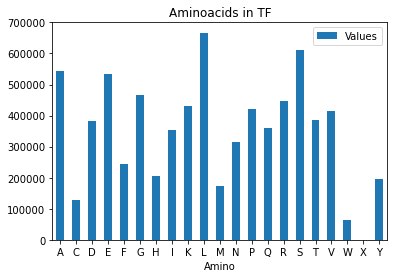

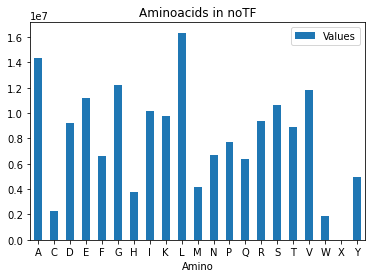

In [8]:
#%% Limpieza de secuencias. Filtro de: (B,O,U,Z)

def cleaning_sequence(sequence):

    clean_seq_tfs = []
    
    for seq in sequence:
        
        seq_1 = list(seq)
    
        if not any(amino in seq_1 for amino in ('B','O','U','Z')):
            clean_seq_tfs.append(seq)
            
    return clean_seq_tfs

clean_seq_tfs = cleaning_sequence(seq_tfs)
clean_seq_notfs = cleaning_sequence(seq_notfs)

clean_amino2count_tf = amino_count(clean_seq_tfs)
clean_amino2count_notf = amino_count(clean_seq_notfs)

print('Aminoacids present in tf dataset after cleaning: ', clean_amino2count_tf)
print('Aminoacids present in notf dataset after cleaning: ', clean_amino2count_notf)

clean_amino_tf = histograms(clean_amino2count_tf, clean_amino2count_notf)

In [9]:
#%% Tokenization and example

from tensorflow.keras.preprocessing.text import Tokenizer
import re

to_exclude = '!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n',
to_include = '_'

amino_names = list(clean_amino_tf['Amino'])
print('Aminoacids present in dataset: ', amino_names)
print('Number of different aminoacids: ', len(amino_names))

tokenizer = Tokenizer(num_words = len(amino_names), char_level = True)#, filters=to_exclude)

print(amino_names)

tokenizer.fit_on_texts(amino_names)

print('Aminoacids tokenization: ', tokenizer.word_index)
print('Number of aminoacids tokenized: ', len(tokenizer.word_index))

example_tokenized = tokenizer.texts_to_sequences([clean_seq_tfs[0]]) #str to list
print('Example of tfs sequence: ', clean_seq_tfs[0])
print('Example of tfs sequence tokenized: ', example_tokenized)
print(type(example_tokenized[0][0]))
example_tokenized = [0 if x>21 else x for x in example_tokenized[0] ]
print('Example of tfs sequence tokenized: ', example_tokenized)


#%% SAVING TOKENIZER

import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

    
#%% LOADING TOKENIZER

import pickle
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
    

Aminoacids present in dataset:  ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'X', 'Y']
Number of different aminoacids:  21
['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'X', 'Y']
Aminoacids tokenization:  {'a': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'k': 9, 'l': 10, 'm': 11, 'n': 12, 'p': 13, 'q': 14, 'r': 15, 's': 16, 't': 17, 'v': 18, 'w': 19, 'x': 20, 'y': 21}
Number of aminoacids tokenized:  21
Example of tfs sequence:  MGRKKIQITRIMDERNRQVTFTKRKFGLMKKAYELSVLCDCEIALIIFNSTNKLFQYASTDMDKVLLKYTEYNEPHESRTNSDIVETLRKKGLNGCDSPDPDADDSVGHSPESEDKYRKINEDIDLMISRQRLCAVPPPNFEMPVTIPVSSHNSLVYSNPVSSLGNPNLLPLAHPSLQRNSMSPGVTHRPPSAGNTGGLMGGDLTSGAGTSAGNGYGNPRNSPGLLVSPGNLNKNIQAKSPPPMNLGMNNRKPDLRVLIPPGSKNTMPSVSEDVDLLLNQRINNSQSAQSLATPVVSVATPTLPGQGMGGYPSAISTTYGTEYSLSSADLSSLSGFNTASALHLGSVTGWQQQHLHNMPPSALSQLGACTSTHLSQSSNLSLPSTQSLNIKSEPVSPPRDRTTTPSRYPQHTRHEAGRSPVDSLSSCSSSYDGSDREDHRNEFHSPIGLTR

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.utils import to_categorical
import random

def get_sequences(tokenizer , database):
  sequences_token = tokenizer.texts_to_sequences(database)
  for seq in sequences_token:
        pos = 0
        for x in seq:
            if x > 21:
                seq[pos] = 0
            pos +=1
        
  
  sequences_padded = pad_sequences(sequences_token, truncating = 'post', 
                                   padding = 'post', maxlen = 1000)
  sequences_encoded = to_categorical(sequences_padded) #one hot
  return sequences_encoded

padded_seq_tfs = get_sequences(tokenizer , clean_seq_tfs)

print('Size of full tfs dataset sequence padded: ', padded_seq_tfs.shape)
print('Length of padded example: ', len(padded_seq_tfs[0]))
#print('Example of tfs sequence padded: ', clean_seq_tfs[37770])
#print('Example of tfs sequence padded: ', padded_seq_tfs[37770][-6:])
#print('Example of tfs sequence padded: ', padded_seq_tfs[37770][80:100])
print(len(padded_seq_tfs))
random_clean_seq_notfs = random.choices(clean_seq_notfs, k=len(padded_seq_tfs)*5)
#padded_seq_notfs = get_sequences(tokenizer , clean_seq_notfs[0:35000])
padded_seq_notfs = get_sequences(tokenizer , random_clean_seq_notfs)

print('Size of full notfs dataset sequence padded: ', padded_seq_notfs.shape)
print('Length of padded example: ', len(padded_seq_notfs[0]))

Size of full tfs dataset sequence padded:  (22100, 1000, 21)
Length of padded example:  1000
22100
Size of full notfs dataset sequence padded:  (110500, 1000, 21)
Length of padded example:  1000


In [11]:
#%% Concatenation and generating labels
# WARNING OF CRASH OF RAM !!!!!!!!!!

seq_full = np.concatenate((padded_seq_tfs , padded_seq_notfs))

#[tfs][label]+[notfs][labels]
# ABCBCBB 1
# ANABABABA 35001
#--
# 1 -1
# 0 -3500014

print('Size of full database concatenated: ', seq_full.shape)

labels_ones = np.ones((padded_seq_tfs.shape[0],), dtype = int)
labels_zeros = np.zeros((padded_seq_notfs.shape[0],), dtype = int)
labels = np.concatenate ((labels_ones , labels_zeros))
print('Size of labels vector: ', labels.shape)

#%% DATA SPLIT

X_train, X_test, y_train, y_test = train_test_split(seq_full, labels, test_size = 0.1, 
                                                      random_state = 1, shuffle = True)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.1, 
                                                      random_state = 1, shuffle = True)

print('X_train shape:',X_train.shape, type(X_train))
print('y_train shape:',y_train.shape, type(y_train))

print('X_test shape:',X_test.shape, type(X_test))
print('y_test shape:',y_test.shape, type(y_test))

print('X_valid shape:',X_valid.shape, type(X_valid))
print('y_valid shape:',y_valid.shape, type(y_valid))


Size of full database concatenated:  (132600, 1000, 21)
Size of labels vector:  (132600,)
X_train shape: (107406, 1000, 21) <class 'numpy.ndarray'>
y_train shape: (107406,) <class 'numpy.ndarray'>
X_test shape: (13260, 1000, 21) <class 'numpy.ndarray'>
y_test shape: (13260,) <class 'numpy.ndarray'>
X_valid shape: (11934, 1000, 21) <class 'numpy.ndarray'>
y_valid shape: (11934,) <class 'numpy.ndarray'>


In [12]:
#%% CLEANING RAM

del seq_full

#%% TENSOR COVERSION

import tensorflow as tf
X_train_tensor = tf.expand_dims(X_train, -1)
X_valid_tensor = tf.expand_dims(X_valid, -1)
y_train_tensor = tf.expand_dims(y_train, -1)
y_valid_tensor = tf.expand_dims(y_valid, -1)


print('X_train_tensor shape:',X_train_tensor.shape, type(X_train_tensor))
print('y_train_tensor shape:',y_train_tensor.shape, type(y_train_tensor))

print('X_valid_tensor shape:',X_valid_tensor.shape, type(X_valid_tensor))
print('y_valid_tensor shape:',y_valid_tensor.shape, type(y_valid_tensor))

#%% CLEANING RAM
l_train = len(X_train)

del X_train, X_valid, y_train, y_valid


X_train_tensor shape: (107406, 1000, 21, 1) <class 'tensorflow.python.framework.ops.EagerTensor'>
y_train_tensor shape: (107406, 1) <class 'tensorflow.python.framework.ops.EagerTensor'>
X_valid_tensor shape: (11934, 1000, 21, 1) <class 'tensorflow.python.framework.ops.EagerTensor'>
y_valid_tensor shape: (11934, 1) <class 'tensorflow.python.framework.ops.EagerTensor'>


In [13]:
#########################################################################################################
#%% MECANISMO DE ATENCION:
#########################################################################################################

from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K

class Attention_A2(Layer):
    
    def __init__(self, return_sequences = True):
        self.return_sequences = return_sequences
        super(Attention_A2,self).__init__()
 
    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                                initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                                initializer='zeros', trainable=True)        
        super(Attention_A2, self).build(input_shape)
 
    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context
    
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'return_sequences': self.return_sequences 
        })
        return config

In [14]:
#%% CNN MODEL BASED ON DEEPTFACTOR

from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Concatenate, concatenate, Input
from keras.layers import Conv2D, MaxPooling2D, MaxPooling3D, GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.utils.vis_utils import plot_model
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from keras.layers import TimeDistributed

class CNN_LSTM:
    
    def loading():
        
        initial_learning_rate = 0.001
        ###################### FIRST CNN #####################################
        model_1 = Sequential()
        
        model_1.add(Conv2D(128, (4, 21), input_shape = X_train_tensor.shape[1:]))
        model_1.add(BatchNormalization())
        model_1.add(Activation('relu'))
        model_1.add(Dropout(0.2))
        
        model_1.add(Conv2D(128, (4, 1)))
        model_1.add(BatchNormalization())
        model_1.add(Activation('relu'))
        model_1.add(Dropout(0.5))
        
        model_1.add(Conv2D(128, (16, 1)))
        model_1.add(BatchNormalization())
        model_1.add(Activation('relu'))
        model_1.add(Dropout(0.7))
        
        ###################### SECOND CNN #####################################
        
        model_2 = Sequential()
        
        model_2.add(Conv2D(128, (12, 21), input_shape = X_train_tensor.shape[1:]))
        model_2.add(BatchNormalization())
        model_2.add(Activation('relu'))
        model_2.add(Dropout(0.2))
        
        model_2.add(Conv2D(128, (8, 1)))
        model_2.add(BatchNormalization())
        model_2.add(Activation('relu'))
        model_2.add(Dropout(0.5))
        
        model_2.add(Conv2D(128, (4, 1)))
        model_2.add(BatchNormalization())
        model_2.add(Activation('relu'))
        model_2.add(Dropout(0.7))
        
        ###################### THIRD CNN #####################################
        
        model_3 = Sequential()
        
        model_3.add(Conv2D(128, (16, 21), input_shape = X_train_tensor.shape[1:]))
        model_3.add(BatchNormalization())
        model_3.add(Activation('relu'))
        model_3.add(Dropout(0.2))
        
        model_3.add(Conv2D(128, (4, 1)))
        model_3.add(BatchNormalization())
        model_3.add(Activation('relu'))
        model_3.add(Dropout(0.5))
        
        model_3.add(Conv2D(128, (4, 1)))
        model_3.add(BatchNormalization())
        model_3.add(Activation('relu'))
        model_3.add(Dropout(0.7))
        
        ###################### FOURTH CNN #####################################
        
        model_4 = Sequential()
        
        model_4.add(Conv2D(128, (6, 21), input_shape = X_train_tensor.shape[1:]))
        model_4.add(BatchNormalization())
        model_4.add(Activation('relu'))
        model_4.add(Dropout(0.2))
        
        model_4.add(Conv2D(128, (6, 1)))
        model_4.add(BatchNormalization())
        model_4.add(Activation('relu'))
        model_4.add(Dropout(0.5))
        
        model_4.add(Conv2D(128, (12, 1)))
        model_4.add(BatchNormalization())
        model_4.add(Activation('relu'))
        model_4.add(Dropout(0.7))
        
                
        ###################### FIFTH CNN #####################################
        """
        model_5 = Sequential()
        
        model_5.add(Conv2D(128, (12, 21), input_shape = X_train_tensor.shape[1:]))
        model_5.add(BatchNormalization())
        model_5.add(Activation('relu'))
        model_5.add(Dropout(0.4))
        
        model_5.add(Conv2D(128, (8, 1)))
        model_5.add(BatchNormalization())
        model_5.add(Activation('relu'))
        model_5.add(Dropout(0.6))
        
        model_5.add(Conv2D(128, (4, 1)))
        model_5.add(BatchNormalization())
        model_5.add(Activation('relu'))
        model_5.add(Dropout(0.8))
    
    
        """
        ###################### CONCATENATION AND LSTM #################################
        
        merge = Concatenate()([model_1.output, model_2.output, model_3.output, model_4.output])
        #merge = Concatenate()([model_1.output, model_2.output])
        
        merge_1 = Conv2D(512, (1, 1))(merge)
        merge_2 = BatchNormalization()(merge_1)
        merge_3 = Activation('relu')(merge_2)
        merge_4 = MaxPooling2D(pool_size = (2, 1))(merge_3)        
        
        # https://stackoverflow.com/questions/52936132/4d-input-in-lstm-layer-in-keras
        
        lstm_1 = TimeDistributed(Flatten(input_shape = (1,512)))(merge_4)
        lstm_2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))(lstm_1)
        output = tf.keras.layers.Dense(1, kernel_regularizer = 'L2', activation = 'sigmoid')(lstm_2)
        
        #lstm_1 = TimeDistributed(Flatten(input_shape = (1,512)))(merge_4)
        #lstm_2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, return_sequences = True))(lstm_1)
        #attn_1 = Attention_A2()(lstm_2)
        #output = tf.keras.layers.Dense(1, kernel_regularizer = 'l2', activation = 'sigmoid')(lstm_2)

        ###################### MODEL #####################################
        
        model = Model(inputs = [model_1.input, model_2.input, model_3.input, model_4.input], outputs = output)
        
        #model = Model(inputs = [model_1.input, model_2.input], outputs = output)
        opt = keras.optimizers.Adam(learning_rate = 0.001)
        #opt = keras.optimizers.SGD(learning_rate = initial_learning_rate)
        model.compile(loss = 'binary_crossentropy',
                      optimizer = opt,
                      metrics = ['accuracy', 'AUC', 'Precision','Recall', 'TrueNegatives', 'TruePositives', 'FalseNegatives','FalsePositives'])
        
        return model
    
#%%


In [15]:
import math
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 8.0
    lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate


class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.lr = []
 
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.lr.append(step_decay(len(self.losses)))

In [16]:
###################### SAVING SUMMARY ###################################model = CNN_LSTM.loading()
model = CNN_LSTM.loading()
model.summary()

from contextlib import redirect_stdout

with open('model_summary.txt', 'w') as f:
    with redirect_stdout(f):
        model.summary()

plot_model(model, to_file = 'model_figure_CNN_LSTM.png', show_shapes = True)

#% decay calc
def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)


#%% TRAINING
# initial_learning_rate = 0.01
# l0 = initial_learning_rate
batch_size = 64
epochs = 50
#decay = initial_learning_rate / epochs 
loss_history = LossHistory()
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)
t0 = time.time()


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3,
                              patience=5, min_lr=0.00001, verbose = 1)

estop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     'saved_model.h5',
#     save_weights_only=True,
#     monitor='val_loss',
#     mode='min',
#     verbose=1,
#     save_best_only=True)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    'saved_model.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True)

h = model.fit([X_train_tensor,X_train_tensor,X_train_tensor,X_train_tensor], y_train_tensor,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = ([X_valid_tensor,X_valid_tensor,X_valid_tensor,X_valid_tensor], y_valid_tensor),
                    callbacks=[reduce_lr, estop, model_checkpoint_callback]
                    #callbacks = [model_checkpoint_callback, estop]
                    )
t1 = time.time()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv2d_input (InputLayer)      [(None, 1000, 21, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3_input (InputLayer)    [(None, 1000, 21, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6_input (InputLayer)    [(None, 1000, 21, 1  0           []                               
                                )]                                                            

 dropout_7 (Dropout)            (None, 982, 1, 128)  0           ['activation_7[0][0]']           
                                                                                                  
 dropout_10 (Dropout)           (None, 990, 1, 128)  0           ['activation_10[0][0]']          
                                                                                                  
 conv2d_2 (Conv2D)              (None, 979, 1, 128)  262272      ['dropout_1[0][0]']              
                                                                                                  
 conv2d_5 (Conv2D)              (None, 979, 1, 128)  65664       ['dropout_4[0][0]']              
                                                                                                  
 conv2d_8 (Conv2D)              (None, 979, 1, 128)  65664       ['dropout_7[0][0]']              
                                                                                                  
 conv2d_11

Epoch 3/50
1679/1679 [==============================] - ETA: 0s - loss: 0.2298 - accuracy: 0.9158 - auc: 0.9327 - precision: 0.8029 - recall: 0.6534 - true_negatives: 86711.0000 - true_positives: 11652.0000 - false_negatives: 6182.0000 - false_positives: 2861.0000
Epoch 3: val_accuracy improved from 0.88948 to 0.92266, saving model to saved_model.h5
1679/1679 [==============================] - 469s 279ms/step - loss: 0.2298 - accuracy: 0.9158 - auc: 0.9327 - precision: 0.8029 - recall: 0.6534 - true_negatives: 86711.0000 - true_positives: 11652.0000 - false_negatives: 6182.0000 - false_positives: 2861.0000 - val_loss: 0.2386 - val_accuracy: 0.9227 - val_auc: 0.9343 - val_precision: 0.8772 - val_recall: 0.6306 - val_true_negatives: 9739.0000 - val_true_positives: 1272.0000 - val_false_negatives: 745.0000 - val_false_positives: 178.0000 - lr: 0.0010
Epoch 4/50
1679/1679 [==============================] - ETA: 0s - loss: 0.2051 - accuracy: 0.9283 - auc: 0.9450 - precision: 0.8415 - recall

Epoch 13/50
1679/1679 [==============================] - ETA: 0s - loss: 0.1060 - accuracy: 0.9670 - auc: 0.9846 - precision: 0.9281 - recall: 0.8685 - true_negatives: 88373.0000 - true_positives: 15488.0000 - false_negatives: 2346.0000 - false_positives: 1199.0000
Epoch 13: val_accuracy improved from 0.95928 to 0.96229, saving model to saved_model.h5
1679/1679 [==============================] - 471s 281ms/step - loss: 0.1060 - accuracy: 0.9670 - auc: 0.9846 - precision: 0.9281 - recall: 0.8685 - true_negatives: 88373.0000 - true_positives: 15488.0000 - false_negatives: 2346.0000 - false_positives: 1199.0000 - val_loss: 0.1299 - val_accuracy: 0.9623 - val_auc: 0.9758 - val_precision: 0.9553 - val_recall: 0.8151 - val_true_negatives: 9840.0000 - val_true_positives: 1644.0000 - val_false_negatives: 373.0000 - val_false_positives: 77.0000 - lr: 0.0010
Epoch 14/50
1679/1679 [==============================] - ETA: 0s - loss: 0.1021 - accuracy: 0.9680 - auc: 0.9862 - precision: 0.9272 - reca

Epoch 23/50
1679/1679 [==============================] - ETA: 0s - loss: 0.0643 - accuracy: 0.9824 - auc: 0.9936 - precision: 0.9586 - recall: 0.9347 - true_negatives: 88852.0000 - true_positives: 16669.0000 - false_negatives: 1165.0000 - false_positives: 720.0000
Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.

Epoch 23: val_accuracy did not improve from 0.96807
1679/1679 [==============================] - 462s 275ms/step - loss: 0.0643 - accuracy: 0.9824 - auc: 0.9936 - precision: 0.9586 - recall: 0.9347 - true_negatives: 88852.0000 - true_positives: 16669.0000 - false_negatives: 1165.0000 - false_positives: 720.0000 - val_loss: 0.1359 - val_accuracy: 0.9665 - val_auc: 0.9724 - val_precision: 0.9660 - val_recall: 0.8309 - val_true_negatives: 9858.0000 - val_true_positives: 1676.0000 - val_false_negatives: 341.0000 - val_false_positives: 59.0000 - lr: 0.0010
Epoch 24/50
1679/1679 [==============================] - ETA: 0s - loss: 0.0508 - accuracy: 0.9875 

Epoch 33/50
1679/1679 [==============================] - ETA: 0s - loss: 0.0318 - accuracy: 0.9944 - auc: 0.9973 - precision: 0.9854 - recall: 0.9811 - true_negatives: 89312.0000 - true_positives: 17497.0000 - false_negatives: 337.0000 - false_positives: 260.0000
Epoch 33: val_accuracy did not improve from 0.97293
1679/1679 [==============================] - 463s 276ms/step - loss: 0.0318 - accuracy: 0.9944 - auc: 0.9973 - precision: 0.9854 - recall: 0.9811 - true_negatives: 89312.0000 - true_positives: 17497.0000 - false_negatives: 337.0000 - false_positives: 260.0000 - val_loss: 0.1200 - val_accuracy: 0.9726 - val_auc: 0.9698 - val_precision: 0.9553 - val_recall: 0.8790 - val_true_negatives: 9834.0000 - val_true_positives: 1773.0000 - val_false_negatives: 244.0000 - val_false_positives: 83.0000 - lr: 9.0000e-05
Epoch 34/50
1679/1679 [==============================] - ETA: 0s - loss: 0.0308 - accuracy: 0.9945 - auc: 0.9973 - precision: 0.9862 - recall: 0.9805 - true_negatives: 89328.0

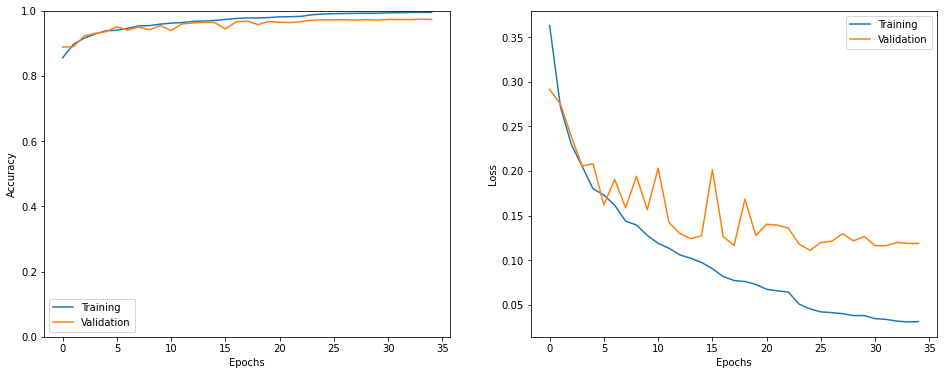

In [17]:
#%% DISPLAYING PLOTS

def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('CNN_history.png')
    
    plt.show()
    
show_history(h)


#%%

In [18]:
import pandas as pd

hist_df = pd.DataFrame(h.history) 
hist_csv_file = 'DataOriginal_full.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

y_pred = model.predict( [X_test,X_test,X_test, X_test])
print("prediction shape:", y_pred.shape)
print("test shape:", y_test.shape)
y_pred = np.squeeze(y_pred, 1)
print(y_pred)
y_pred = [1. if i> 0.50 else 0. for i in y_pred]
#print(y_pred)
#print("prediction shape:", y_pred.shape)

415/415 [==============================] - 39s 88ms/step
prediction shape: (13260, 1)
test shape: (13260,)
[0.00176932 0.00314677 0.00172193 ... 0.00166716 0.00167264 0.0016691 ]


<AxesSubplot:>

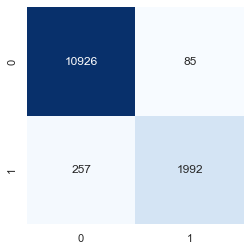

In [20]:
M = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = M.ravel()
# plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set_theme()

matrix_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
